In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf
pd.options.mode.chained_assignment = None  # default='warn'

### Peripheral MOp merfish gene/ontology results on 19 ontologies mapped to 10Xv3

In [2]:
mop_periph_df = pd.read_csv('../outputs/gene_ontology/MOp_periphal_ReadZs_10X_gene_ontology.csv')
mop_periph_df['Mouse'] = 'Mouse '+mop_periph_df['sample_id'].str[1]
mop_periph_df['Slice'] = 'Slice '+mop_periph_df['sample_id'].str[3]
mop_periph_df.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Mouse,Slice
0,m1s1,Acta2,L2/3 IT,397,6.0,611.0,0.087413,26.992258,46.958252,3.938975,0.000082,0.000293,Mouse 1,Slice 1
1,m1s1,Acta2,L5 ET,51,6.0,698.0,0.032479,2.767631,6.067670,1.123562,0.261199,0.367769,Mouse 1,Slice 1
2,m1s1,Acta2,L5 IT,257,6.0,654.0,0.094270,25.067569,29.188310,4.639891,0.000003,0.000015,Mouse 1,Slice 1
3,m1s1,Acta2,L6 CT,26,5.0,304.0,0.176217,4.241585,3.271222,2.345164,0.019019,0.040833,Mouse 1,Slice 1
4,m1s1,Acta2,L6 IT,85,6.0,569.0,0.035714,2.599184,10.194193,0.814068,0.415606,0.527449,Mouse 1,Slice 1


In [7]:
#Counting the number of Flt1 cells over all samples
mop_periph_df[mop_periph_df['gene'].eq('Flt1')].groupby('ontology')['num_cells'].sum()

ontology
Astro       411
Endo       3657
L2/3 IT      22
L5 IT        45
OPC         110
Oligo       482
SMC        2245
VLMC        702
Name: num_cells, dtype: int64

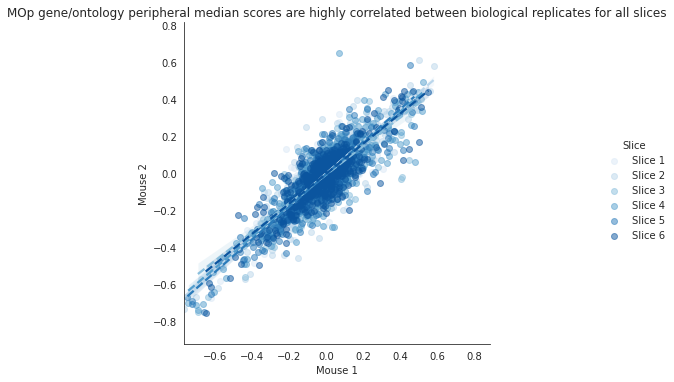

In [183]:
sns.set_style("white")
sample_pair_df = mop_periph_df.pivot(
    index = ['gene','ontology','Slice'],
    columns = 'Mouse',
    values = 'med_score',
).reset_index()

fig = sns.lmplot(
    x = 'Mouse 1',
    y = 'Mouse 2',
    hue = 'Slice',
    palette = 'Blues',
    scatter_kws = {'alpha':0.5},
    line_kws = {'linestyle':'dashed'},
    data = sample_pair_df,
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('equal')
plt.title('MOp gene/ontology peripheral median scores are highly correlated between biological replicates for all slices')
fig.savefig('mop_peripheral_gene_ont_corr_across_mice.svg')
plt.show()
plt.close()

In [127]:
mop_periph_df['ontology'].nunique()

19

In [179]:
sample_pair_df = mop_periph_df.pivot(
    index = ['gene','ontology'],
    columns = 'sample_id',
    values = 'med_score',
)

sample_pair_df

sample_id               m1s1      m1s2      m1s3      m1s4      m1s5  m1s6  \
gene    ontology                                                             
Acta2   L2/3 IT     0.087413  0.102431  0.146667  0.117647  0.104851   NaN   
        L5 ET       0.032479       NaN       NaN -0.009728  0.380703   NaN   
        L5 IT       0.094270  0.116424  0.114403  0.161401  0.194820   NaN   
        L6 CT       0.176217       NaN       NaN  0.218605  0.157537   NaN   
        L6 IT       0.035714  0.214753  0.189794  0.212669  0.172080   NaN   
...                      ...       ...       ...       ...       ...   ...   
Wnt7b   OPC         0.124394  0.092391  0.064327  0.108571  0.036496   NaN   
Zfp804b L5 ET            NaN       NaN       NaN       NaN -0.229299   NaN   
        L6 CT            NaN       NaN       NaN       NaN -0.151163   NaN   
        L6 IT            NaN       NaN       NaN -0.457143 -0.295920   NaN   
        L6 IT Car3       NaN -0.262329 -0.076041 -0.253463       NaN   NaN   

sample_id               m2s1      m2s2      m2s3     m2s4     m2s5      m2s6  
gene    ontology                                                              
Acta2   L2/3 IT     0.030987       NaN       NaN      NaN      NaN       NaN  
        L5 ET            NaN       NaN       NaN      NaN      NaN       NaN  
        L5 IT            NaN       NaN       NaN      NaN      NaN       NaN  
        L6 CT            NaN       NaN       NaN      NaN      NaN       NaN  
        L6 IT            NaN       NaN       NaN      NaN      NaN       NaN  
...                      ...       ...       ...      ...      ...       ...  
Wnt7b   OPC         0.046632  0.063218  0.064935  0.09061  0.12493  0.156864  
Zfp804b L5 ET            NaN       NaN       NaN      NaN      NaN       NaN  
        L6 CT            NaN       NaN       NaN      NaN      NaN       NaN  
        L6 IT            NaN       NaN       NaN      NaN      NaN       NaN  
        L6 IT Car3       NaN       NaN       NaN      NaN      NaN       NaN  

[1370 rows x 12 columns]

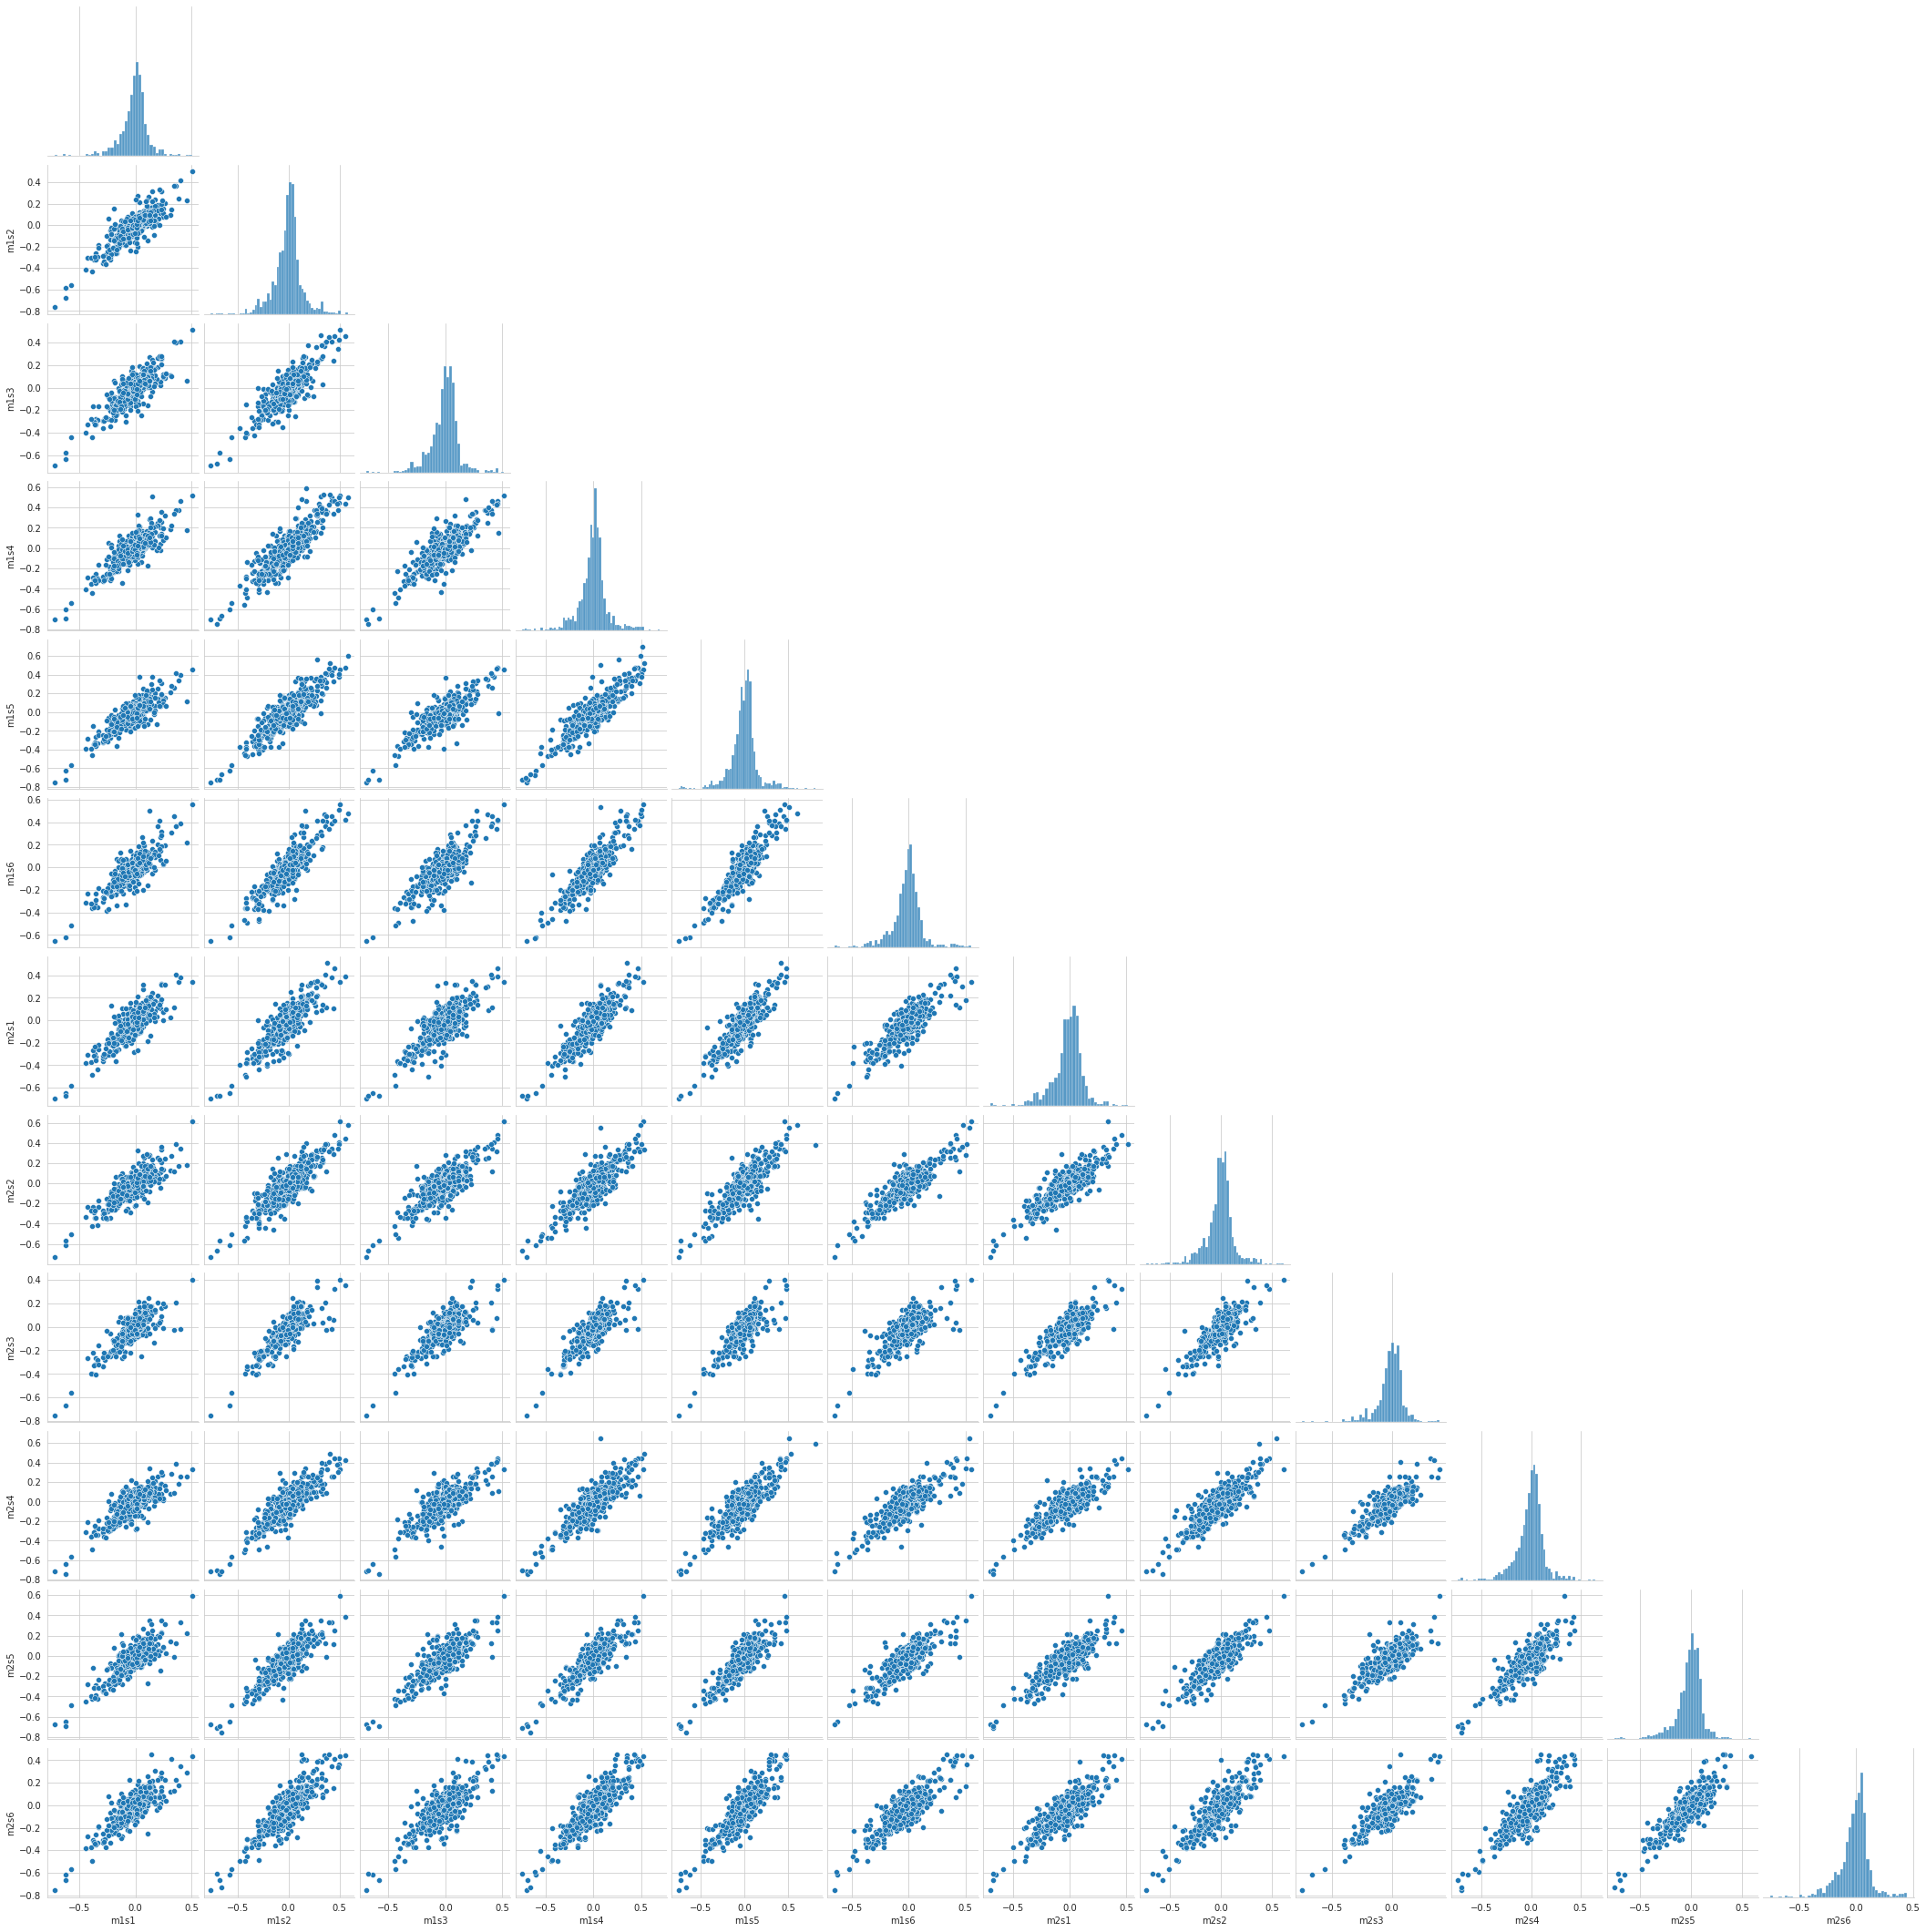

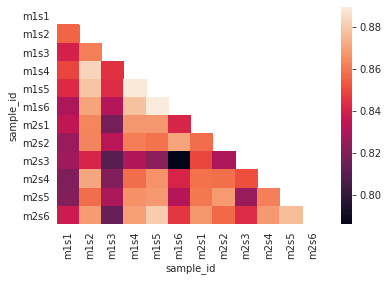

In [180]:
#Goal of these plots is to show that gene/ontology median score is well-correlated across biological replicates

#pairplot
sns.pairplot(
    sample_pair_df,
    corner=True,
)
plt.show()
plt.close()


#heatmap
hm_df = sample_pair_df.corr()
mask = np.zeros_like(hm_df)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    hm_df,
    mask=mask,
)
plt.show()
plt.close()

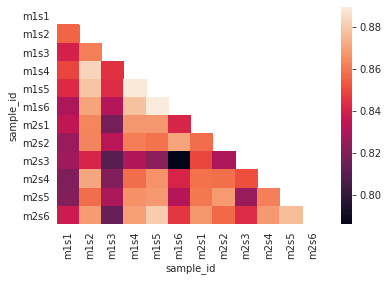

In [181]:
#heatmap
hm_df = sample_pair_df.corr()
mask = np.zeros_like(hm_df)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure()
sns.heatmap(
    hm_df,
    mask=mask,
)
plt.show()
fig.savefig('mop_peripheral_gene_ont_heatmap.svg')
plt.close()

In [24]:
#68 genes have significant peripheral in at least one celltype,
#and significant central in at least one other celltype
pos_and_neg_sig = (
    mop_df[
        mop_df['bh_p'].le(0.05)
    ].groupby('gene').filter(
        lambda g: g['med_score'].gt(0).nunique() > 1
    )
)

pos_and_neg_sig['gene'].nunique()

68

In [25]:
pos_and_neg_sig['gene'].value_counts()

Ptprt      92
Dscaml1    90
Luzp2      89
Nr4a1      81
Rgs6       77
           ..
Cacng5      6
Lhx6        3
Prox1       3
Syt10       2
Lsp1        2
Name: gene, Length: 68, dtype: int64

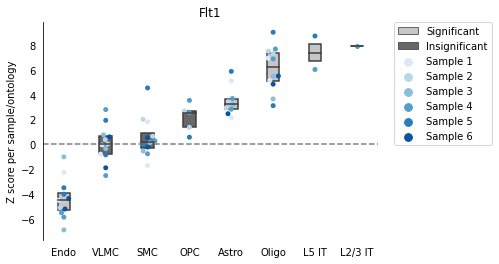

In [8]:
# simplified diagram for a single gene
gene = 'Flt1'

plot_df = mop_periph_df[mop_periph_df['gene'].eq(gene)].copy()
plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 1) #filtering out ontologies with too few samples
plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
sig = plot_df.groupby('ontology')['bh_p'].transform('mean').le(0.05)
plot_df['significant'] = np.where(sig,'Significant','Insignificant')
plot_df = plot_df.sort_values('mean_ont_z')

ax = sns.swarmplot(
    x = 'ontology',
    y = 'z',
    hue = 'sample',
    hue_order = sorted(plot_df['sample'].unique()),
    palette = 'Blues',
    data = plot_df,
)
sns.boxplot(
    x = 'ontology',
    y = 'z',
    hue = 'significant',
    dodge = False,
    width=0.3,
    #showbox=False,
    whiskerprops={'visible':False},
    showcaps=False,
    #capprops={'color':'white'},
    palette = 'Greys',
    fliersize = 0,
    data = plot_df,
    zorder = 10,
    ax = ax,
)
ax.tick_params(left=False, bottom=False)
sns.despine(bottom=True)
plt.axhline(0,linestyle='dashed',color='grey')
plt.title('{}'.format(gene))
plt.xlabel('')
plt.ylabel('Z score per sample/ontology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.close()

In [51]:
# simplified diagram for a single gene
gene = 'Timp3'

plot_df = mop_periph_df[mop_periph_df['gene'].eq(gene)].copy()
plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
sig = plot_df.groupby('ontology')['bh_p'].transform('mean').le(0.05)
plot_df['significant'] = np.where(sig,'Significant','Insignificant')
plot_df = plot_df.sort_values('mean_ont_z')

ax = sns.swarmplot(
    x = 'ontology',
    y = 'z',
    hue = 'sample',
    hue_order = sorted(plot_df['sample'].unique()),
    palette = 'Blues',
    data = plot_df,
)
sns.boxplot(
    x = 'ontology',
    y = 'z',
    hue = 'significant',
    dodge = False,
    width=0.3,
    #showbox=False,
    whiskerprops={'visible':False},
    showcaps=False,
    #capprops={'color':'white'},
    palette = 'Greys',
    fliersize = 0,
    data = plot_df,
    zorder = 10,
    ax = ax,
)
ax.tick_params(left=False, bottom=False)
sns.despine(bottom=True)
plt.axhline(0,linestyle='dashed',color='grey')
plt.title('{}'.format(gene))
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Z score per sample/ontology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('timp3_peripheral_ont_boxplot.svg')
plt.close()

In [134]:
# simplified diagram making a separate plot for each gene
pdf = matplotlib.backends.backend_pdf.PdfPages('srrs_MERFISH_simplified_peripheral.pdf')

for gene,plot_df in mop_df.groupby('gene'):

    plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
    plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
    plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
    plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
    sig = plot_df.groupby('ontology')['bh_p'].transform('mean').le(0.05)
    plot_df['significant'] = np.where(sig,'Significant','Insignificant')
    plot_df = plot_df.sort_values(['mean_ont_z','significant'])

    if plot_df.empty:
        continue
    
    ax = sns.stripplot(
        x = 'ontology',
        y = 'z',
        hue = 'sample',
        hue_order = sorted(plot_df['sample'].unique()),
        palette = 'Blues',
        data = plot_df,
    )
    sns.boxplot(
        x = 'ontology',
        y = 'z',
        hue = 'significant',
        dodge = False,
        width=0.3,
        whiskerprops={'visible':False},
        showcaps=False,
        palette = {'Insignificant':'grey','Significant':'brown'},
        fliersize = 0,
        data = plot_df,
        zorder = 10,
        ax = ax,
    )
    ax.tick_params(left=False, bottom=False)
    sns.despine(bottom=True)
    plt.axhline(0,linestyle='dashed',color='grey')
    plt.title('{}'.format(gene))
    plt.xlabel('')
    plt.ylim(-10,10)
    plt.ylabel('Z score per sample/ontology')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    #plt.show()
    pdf.savefig()
    plt.close()
    
pdf.close()

In [28]:
#gene-cell level df
gc_mop = pd.read_csv('../outputs/gene_cell/MOp_peripheral_ReadZs_gene_ontology.csv')
gc_mop.head()

,metric,cell_id,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id,ontology
0,peripheral,10000143038275111136124942858811168393,168,Cxcl14,13,67.0,0.209581,0.062617,2,4,1,m2s4,Astro
1,peripheral,10000143038275111136124942858811168393,168,Daam2,23,113.0,-0.341317,0.035146,2,4,1,m2s4,Astro
2,peripheral,10000143038275111136124942858811168393,168,Egfr,6,56.0,0.341317,0.105180,2,4,1,m2s4,Astro
3,peripheral,10000143038275111136124942858811168393,168,Igfbp5,12,44.5,0.479042,0.062329,2,4,1,m2s4,Astro
4,peripheral,10000143038275111136124942858811168393,168,Pdlim5,5,108.0,-0.281437,0.141105,2,4,1,m2s4,Astro


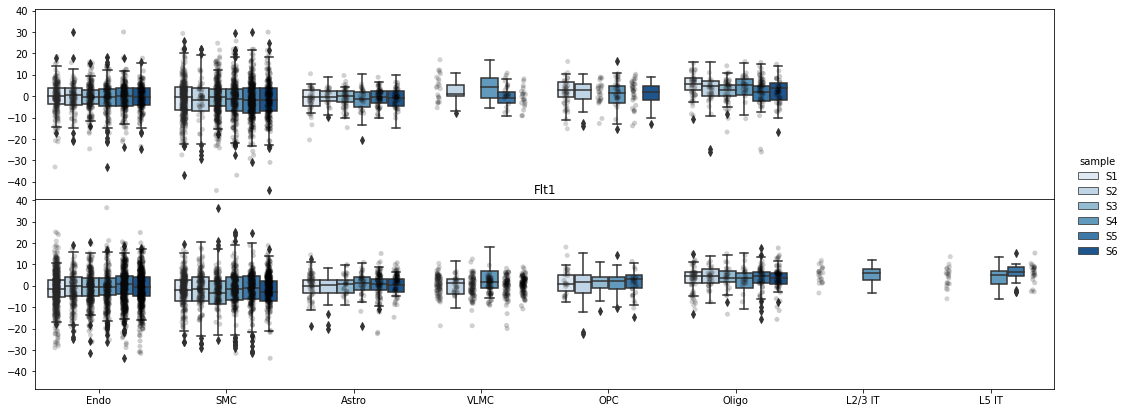

In [29]:
#Boxplots for a single gene of interest
#Note this was an older plotting style
#I'll leave it in the notebook, but it does a poor job of making the statistical differences visually clear
gene = 'Flt1'

plot_df = gc_mop[gc_mop['gene'].eq(gene)].copy()
plot_df['Normalized score'] = plot_df['score'].div(plot_df['variance'])
plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
plot_df['sample'] = 'S'+plot_df['sample_id'].str[3]

g = sns.catplot(
    x = 'ontology',
    y = 'Normalized score',
    kind = 'box',
    height = 3,
    aspect = 5,
    hue = 'sample',
    hue_order = sorted(plot_df['sample'].unique()),
    palette = 'Blues',
    dodge = True,
    #legend = False,
    row = 'mouse',
    data = plot_df,
)

#add the individual cells on top
g.map_dataframe(
    sns.stripplot, 
    x='ontology',
    y='Normalized score', 
    hue='sample',
    color = 'black',
    alpha=0.2, 
    dodge=True,
)


(
    g.set_titles('')
     .despine(right=False,top=False)
     .set(
         #ylim=(-20,20),
         xlabel='',
     )
     
)

plt.subplots_adjust(wspace=0,hspace=0)
plt.title('{}'.format(gene))
plt.show()
plt.close()

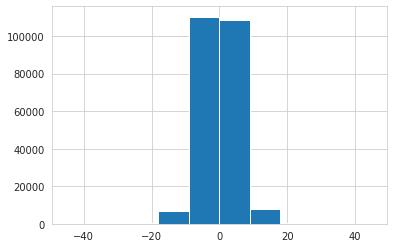

In [34]:
cat_df['z'].hist()
plt.show()
plt.close()

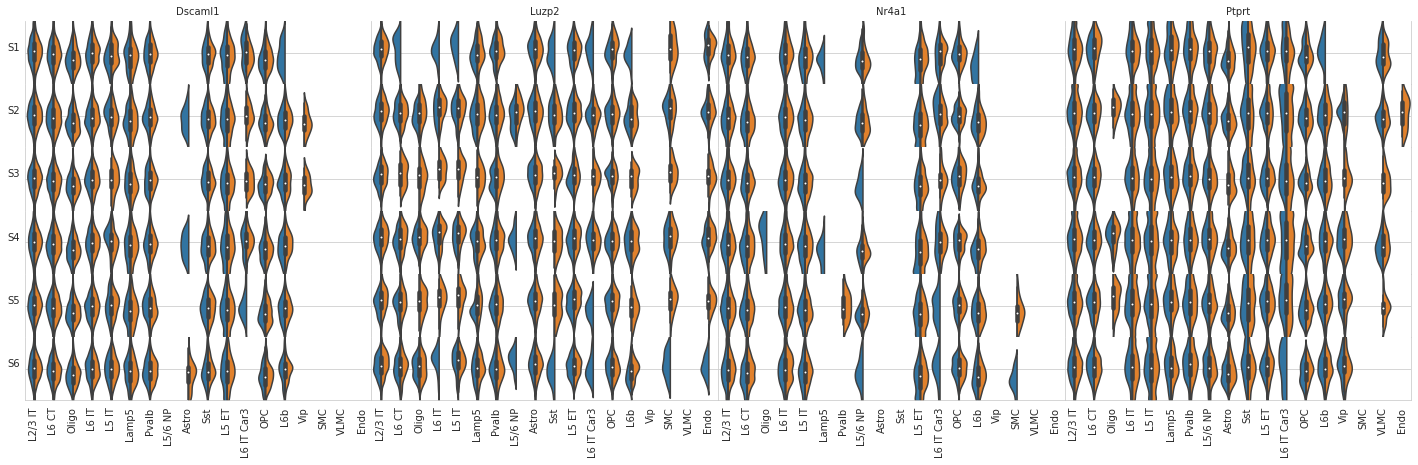

In [42]:
#Trying to plot multiple genes on the same plot
#maybe only useful as a supplemental figure?
sns.set_style("whitegrid")

genes = ['Ptprt','Dscaml1','Luzp2','Nr4a1']
cat_df = gc_mop[gc_mop['gene'].isin(genes)].copy()
cat_df['mouse'] = 'Mouse '+cat_df['sample_id'].str[1]
cat_df['sample'] = 'S'+cat_df['sample_id'].str[3]
cat_df['z'] = cat_df['score']/cat_df['variance']
cat_df.loc[cat_df['z'].lt(-10),'z'] = -10 #truncate huge outlying z-values
cat_df.loc[cat_df['z'].gt(10),'z'] = 10 #truncate huge outlying z-values

uniq_genes = sorted(cat_df['gene'].unique())
uniq_samples = sorted(cat_df['sample'].unique())

g = sns.catplot(
    x = 'ontology',
    y = 'z',
    hue = 'mouse',
    split = True,
    kind = 'violin',
    row = 'sample',
    col = 'gene',
    row_order = uniq_samples,
    col_order = uniq_genes,
    legend = False,
    height = 1,
    aspect = 5,
    data = cat_df,
)

#Formatting presentation
(
    g.set_titles('{col_name}')
     .set_xticklabels(rotation=90)
     .set_yticklabels(rotation=0)
     .despine(right=False)
     .set(
         ylim=(-10,10),
         yticks=[0],
         yticklabels=[],
         xlabel='',
     )
     
)

#Have to "manually" change the plot titles (???) ridiculous
for i,row_ax in enumerate(g.axes):
    for j,sp_ax in enumerate(row_ax):
        if j == 0:
            sp_ax.set_ylabel(uniq_samples[i],rotation=0)
        if i > 0:
            sp_ax.set_title('')
                        

plt.subplots_adjust(wspace=0,hspace=0)
plt.show()
plt.close()

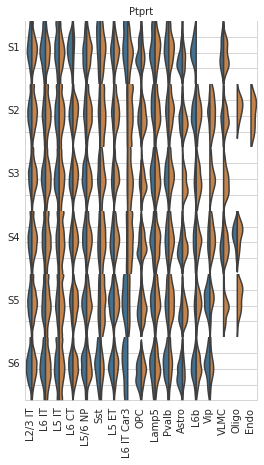

In [43]:
#Plot one gene at a time
sns.set_style("whitegrid")

gene = 'Ptprt'


sig_samp_onts = (
    mop_df[
        mop_df['gene'].eq(gene)
    ].set_index(
        ['sample_id','ontology']
    )['bh_p'].le(0.05)
)

cat_df = gc_mop[gc_mop['gene'].eq(gene)].copy()
cat_df = cat_df.set_index(['sample_id','ontology'])
cat_df['Significant'] = sig_samp_onts
cat_df = cat_df.reset_index()

cat_df['mouse'] = 'Mouse '+cat_df['sample_id'].str[1]
cat_df['sample'] = 'S'+cat_df['sample_id'].str[3]
cat_df['z'] = cat_df['score']/cat_df['variance']
cat_df.loc[cat_df['z'].lt(-10),'z'] = -10 #truncate huge outlying z-values
cat_df.loc[cat_df['z'].gt(10),'z'] = 10 #truncate huge outlying z-values

uniq_genes = sorted(cat_df['gene'].unique())
uniq_samples = sorted(cat_df['sample'].unique())
uniq_mice = sorted(cat_df['mouse'].unique())
uniq_onts = sorted(cat_df['ontology'].unique())

g = sns.catplot(
    x = 'ontology',
    y = 'z',
    hue = 'mouse',
    split = True,
    kind = 'violin',
    inner = None,
    row = 'sample',
    col = 'gene',
    scale = 'count', #scale width of violins by number of cells
    scale_hue = True,
    saturation = 0.5,
    row_order = uniq_samples,
    col_order = uniq_genes,
    legend = False,
    height = 1,
    aspect = 4,
    data = cat_df,
)

#Formatting presentation
(
    g.set_titles('{col_name}')
     .set_xticklabels(rotation=90)
     .despine(right=False)
     .set(
         ylim=(-10,10),
         yticks=[-5,0,5],
         yticklabels=[],
         xlabel='',
     )
     
)

#Have to manually change the plot titles (???) ridiculous
for i,row_ax in enumerate(g.axes):
    for j,sp_ax in enumerate(row_ax):
        if j == 0:
            sp_ax.set_ylabel(uniq_samples[i],rotation=0)
        if i > 0:
            sp_ax.set_title('')
            
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()
plt.close()

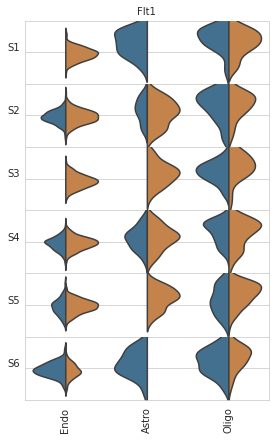

In [45]:
#Plot one gene at a time but only significant celltypes
sns.set_style("whitegrid")

gene = 'Flt1'


sig_samp_onts = (
    mop_df[
        mop_df['gene'].eq(gene)
    ].set_index(
        ['sample_id','ontology']
    )['bh_p'].le(0.05)
)

cat_df = gc_mop[gc_mop['gene'].eq(gene)].copy()
cat_df = cat_df.set_index(['sample_id','ontology'])
cat_df['Significant'] = sig_samp_onts
cat_df = cat_df.reset_index()

cat_df = cat_df[cat_df['Significant']] #NOTE FILTERING TO JUST THE SIGNIFICANT sample/celltypes
cat_df = cat_df[cat_df['ontology'].isin(['Endo','Astro','Oligo'])] #Note subsetting even more

cat_df['mouse'] = 'Mouse '+cat_df['sample_id'].str[1]
cat_df['sample'] = 'S'+cat_df['sample_id'].str[3]

uniq_genes = sorted(cat_df['gene'].unique())
uniq_samples = sorted(cat_df['sample'].unique())
uniq_mice = sorted(cat_df['mouse'].unique())
uniq_onts = sorted(cat_df['ontology'].unique())

g = sns.catplot(
    x = 'ontology',
    y = 'score',
    hue = 'mouse',
    split = True,
    kind = 'violin',
    inner = None,
    row = 'sample',
    col = 'gene',
    scale = 'count', #scale width of violins by number of cells
    scale_hue = True,
    saturation = 0.5,
    row_order = uniq_samples,
    col_order = uniq_genes,
    legend = False,
    height = 1,
    aspect = 4,
    data = cat_df,
)

#Formatting presentation
(
    g.set_titles('{col_name}')
     .set_xticklabels(rotation=90)
     .despine(right=False)
     .set(
         ylim=(-1,1),
         yticks=[-1,0,1],
         yticklabels=[],
         xlabel='',
     )
     
)

#Have to manually change the plot titles (???) ridiculous
for i,row_ax in enumerate(g.axes):
    for j,sp_ax in enumerate(row_ax):
        if j == 0:
            sp_ax.set_ylabel(uniq_samples[i],rotation=0)
        if i > 0:
            sp_ax.set_title('')
            
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()
plt.close()

In [11]:
g.set_ylabels?

In [12]:
g.set_axis_labels?

### Peripheral MOp merfish gene/ontology results on all 95 MERFISH ontologies


Don't think I want to use this, instead use the 10X-ontologies above

In [13]:
mop_df = pd.read_csv('../outputs/gene_ontology/Merfish_MOp_peripheral.csv')
mop_df.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,m1s1,Acta2,L23_IT_1,274,6.0,618.0,0.110623,25.760223,32.624380,4.510020,6.482149e-06,0.000043
1,m1s1,Acta2,L23_IT_3,50,6.0,649.5,0.036826,2.385558,6.037982,0.970832,3.316320e-01,0.480232
2,m1s1,Acta2,L23_IT_4,73,6.0,563.0,0.051282,-1.153523,8.295889,-0.400493,6.887936e-01,0.793137
3,m1s1,Acta2,L45_IT_1,59,6.0,478.0,0.155263,6.774675,7.123242,2.538339,1.113800e-02,0.032652
4,m1s1,Acta2,L45_IT_3,146,6.0,626.5,0.194169,20.359247,17.245112,4.902625,9.456429e-07,0.000007


In [14]:
mop_df['annotation'].nunique()

95

In [15]:
#more than half of the gene/ontologies are significant from MOp
mop_df['bh_p'].le(0.05).value_counts()

False    22898
True     13413
Name: bh_p, dtype: int64

In [16]:
#97 genes have significant peripheral in at least one celltype,
#and significant central in at least one other celltype
pos_and_neg_sig = (
    mop_df[
        mop_df['bh_p'].le(0.05)
    ].groupby('gene').filter(
        lambda g: g['med_score'].gt(0).nunique() > 1
    )
)

pos_and_neg_sig['gene'].nunique()

97

# SeqFish+ gene/ontology results

In [17]:
seq_df = pd.read_csv('../outputs/gene_ontology/SeqFish_peripheral.csv')
seq_df.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,m1s1,Aamp,Excitatory layer 5/6,20,5.5,12498.0,0.094839,2.226461,2.419260,1.431442,0.152304,0.358706
1,m1s1,Abhd12,Excitatory layer 3,27,7.0,6857.0,0.077749,2.312100,3.110525,1.310961,0.189871,0.400258
2,m1s1,Abhd12,Excitatory layer 5/6,37,9.0,9883.0,0.078507,2.429686,3.503960,1.297988,0.194292,0.402065
3,m1s1,Abhd2,choroid plexus,65,8.0,2346.0,-0.047155,-3.246480,6.201979,-1.303610,0.192367,0.401358
4,m1s1,Abhd8,Excitatory layer 3,50,8.0,6110.5,0.003112,2.237509,4.840814,1.016964,0.309171,0.536310


In [18]:
seq_df['gene'].nunique()

284

In [19]:
seq_df['annotation'].nunique()

11

In [20]:
seq_df['bh_p'].le(0.05).value_counts()

False    402
True     105
Name: bh_p, dtype: int64

In [21]:
'Flt1' in seq_df['gene'].values

False

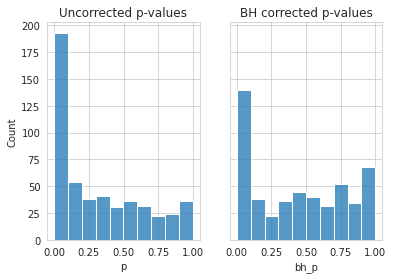

In [22]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey=True)
sns.histplot(seq_df['p'],ax=axs[0])
sns.histplot(seq_df['bh_p'],ax=axs[1])
axs[0].set_title('Uncorrected p-values')
axs[1].set_title('BH corrected p-values')
plt.show()
plt.close()

In [23]:
#no genes have significant peripheral in one celltype, and significant central in another celltype
pos_and_neg_sig = (
    seq_df[
        seq_df['bh_p'].le(0.05)
    ].groupby('gene').filter(
        lambda g: g['med_score'].gt(0).nunique() > 1
    )
)

pos_and_neg_sig

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p


In [24]:
#Kif5a has the highest number of significant ontologies at 5
seq_df[seq_df['bh_p'].le(0.05)]['gene'].value_counts()

Kif5a     5
Sptbn2    4
Lingo1    3
Agap2     3
Cplx1     3
         ..
Rnf157    1
Igsf9b    1
Ncs1      1
Wbp2      1
Eng       1
Name: gene, Length: 76, dtype: int64

In [25]:
#reading in the gene-cell SRRS results for plotting
seq_gc_df = pd.read_csv('../outputs/gene_cell/SeqFish_peripheral.csv')
seq_gc_df.head()

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate
0,peripheral,cell_115,Endothelial,843,Aanat,1,821.0,-0.947743,0.334125,1,1,1
1,peripheral,cell_115,Endothelial,843,Aar2,1,369.0,0.125891,0.334125,1,1,1
2,peripheral,cell_115,Endothelial,843,Aars,1,470.0,-0.114014,0.334125,1,1,1
3,peripheral,cell_115,Endothelial,843,Aatf,1,487.0,-0.154394,0.334125,1,1,1
4,peripheral,cell_115,Endothelial,843,Ackr3,2,443.0,-0.049881,0.166864,1,1,1


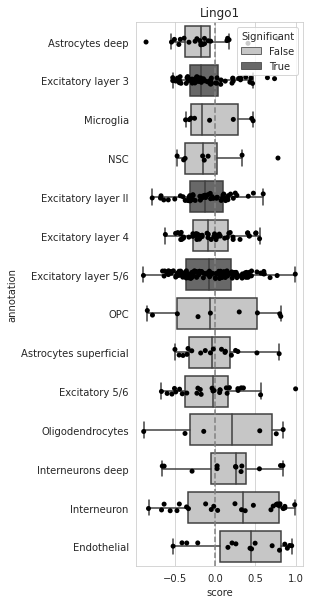

In [26]:
gene = 'Lingo1'


plot_df = seq_gc_df[
    seq_gc_df['gene'].eq(gene) &
    seq_gc_df['annotation'].ne('unannotated')
]

ann_to_bh_p = dict(seq_df[seq_df['gene'].eq(gene)][['annotation','bh_p']].values)
plot_df['bh_p'] = plot_df['annotation'].map(ann_to_bh_p)
plot_df['Significant'] = plot_df['bh_p'].le(0.05)

plot_df['median_score'] = plot_df.groupby('annotation')['score'].transform('median')
plot_df = plot_df.sort_values('median_score')
plot_df = plot_df.groupby('annotation').filter(lambda g: len(g) > 5)

fig = plt.figure(figsize=(3,10))
sns.boxplot(
    x = 'score',
    y = 'annotation',
    hue = 'Significant',
    palette = 'Greys',
    dodge = False,
    fliersize = 0,
    data = plot_df,
)
sns.stripplot(
    x = 'score',
    y = 'annotation',
    color = 'black',
    data = plot_df,
)
plt.axvline(0,color='grey',linestyle='dashed')
plt.title(gene)
plt.show()
plt.close()

### Radial MOp merfish gene/ontology results on 19 ontologies mapped to 10Xv3

In [188]:
mop_radial_df = pd.read_csv('../outputs/gene_ontology/MOp_radial_ReadZs_gene_ontology.csv')
mop_radial_df['Mouse'] = 'Mouse '+mop_radial_df['sample_id'].str[1]
mop_radial_df['Slice'] = 'Slice '+mop_radial_df['sample_id'].str[3]
mop_radial_df.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Mouse,Slice
0,m1s1,Acta2,L2/3 IT,397,6.0,611.0,0.069892,26.390894,46.958252,3.851218,0.000118,0.000387,Mouse 1,Slice 1
1,m1s1,Acta2,L5 ET,51,6.0,698.0,0.051064,4.249919,6.067670,1.725320,0.084470,0.146937,Mouse 1,Slice 1
2,m1s1,Acta2,L5 IT,257,6.0,654.0,0.055679,12.965918,29.188310,2.399931,0.016398,0.035691,Mouse 1,Slice 1
3,m1s1,Acta2,L6 CT,26,5.0,304.0,-0.197255,-4.178031,3.271222,-2.310025,0.020887,0.044275,Mouse 1,Slice 1
4,m1s1,Acta2,L6 IT,85,6.0,569.0,0.091278,4.741353,10.194193,1.484998,0.137544,0.220147,Mouse 1,Slice 1


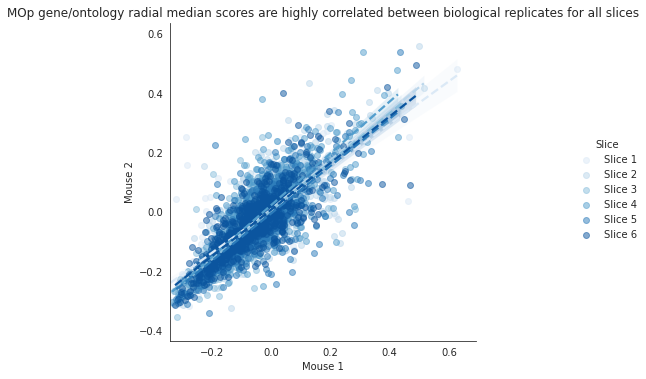

In [189]:
sns.set_style("white")
sample_pair_df = mop_radial_df.pivot(
    index = ['gene','ontology','Slice'],
    columns = 'Mouse',
    values = 'med_score',
).reset_index()

fig = sns.lmplot(
    x = 'Mouse 1',
    y = 'Mouse 2',
    hue = 'Slice',
    palette = 'Blues',
    scatter_kws = {'alpha':0.5},
    line_kws = {'linestyle':'dashed'},
    data = sample_pair_df,
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('equal')
plt.title('MOp gene/ontology radial median scores are highly correlated between biological replicates for all slices')
fig.savefig('mop_radial_gene_ont_corr_across_mice.svg')
plt.show()
plt.close()

In [45]:
sample_pair_df = mop_radial_df.pivot(
    index = ['gene','ontology'],
    columns = 'sample_id',
    values = 'med_score',
)

sample_pair_df

sample_id               m1s1      m1s2      m1s3      m1s4      m1s5  m1s6  \
gene    ontology                                                             
Acta2   L2/3 IT     0.069892  0.164497  0.106936  0.038058  0.008000   NaN   
        L5 ET       0.051064       NaN       NaN  0.061417  0.271060   NaN   
        L5 IT       0.055679  0.139942  0.107034  0.115377  0.096735   NaN   
        L6 CT      -0.197255       NaN       NaN -0.018900 -0.011680   NaN   
        L6 IT       0.091278  0.103632  0.161328  0.059052  0.070789   NaN   
...                      ...       ...       ...       ...       ...   ...   
Wnt7b   OPC        -0.187887 -0.012246 -0.159763 -0.144105 -0.029622   NaN   
Zfp804b L5 ET            NaN       NaN       NaN       NaN  0.092091   NaN   
        L6 CT            NaN       NaN       NaN       NaN  0.023881   NaN   
        L6 IT            NaN       NaN       NaN  0.133183  0.424306   NaN   
        L6 IT Car3       NaN  0.220338  0.011192  0.094830       NaN   NaN   

sample_id               m2s1      m2s2      m2s3  m2s4      m2s5      m2s6  
gene    ontology                                                            
Acta2   L2/3 IT     0.120566       NaN       NaN   NaN       NaN       NaN  
        L5 ET            NaN       NaN       NaN   NaN       NaN       NaN  
        L5 IT            NaN       NaN       NaN   NaN       NaN       NaN  
        L6 CT            NaN       NaN       NaN   NaN       NaN       NaN  
        L6 IT            NaN       NaN       NaN   NaN       NaN       NaN  
...                      ...       ...       ...   ...       ...       ...  
Wnt7b   OPC        -0.063830 -0.008721 -0.055375   0.0 -0.026191 -0.094832  
Zfp804b L5 ET            NaN       NaN       NaN   NaN       NaN       NaN  
        L6 CT            NaN       NaN       NaN   NaN       NaN       NaN  
        L6 IT            NaN       NaN       NaN   NaN       NaN       NaN  
        L6 IT Car3       NaN       NaN       NaN   NaN       NaN       NaN  

[1370 rows x 12 columns]

In [47]:
mop_radial_df['ontology'].nunique()

19

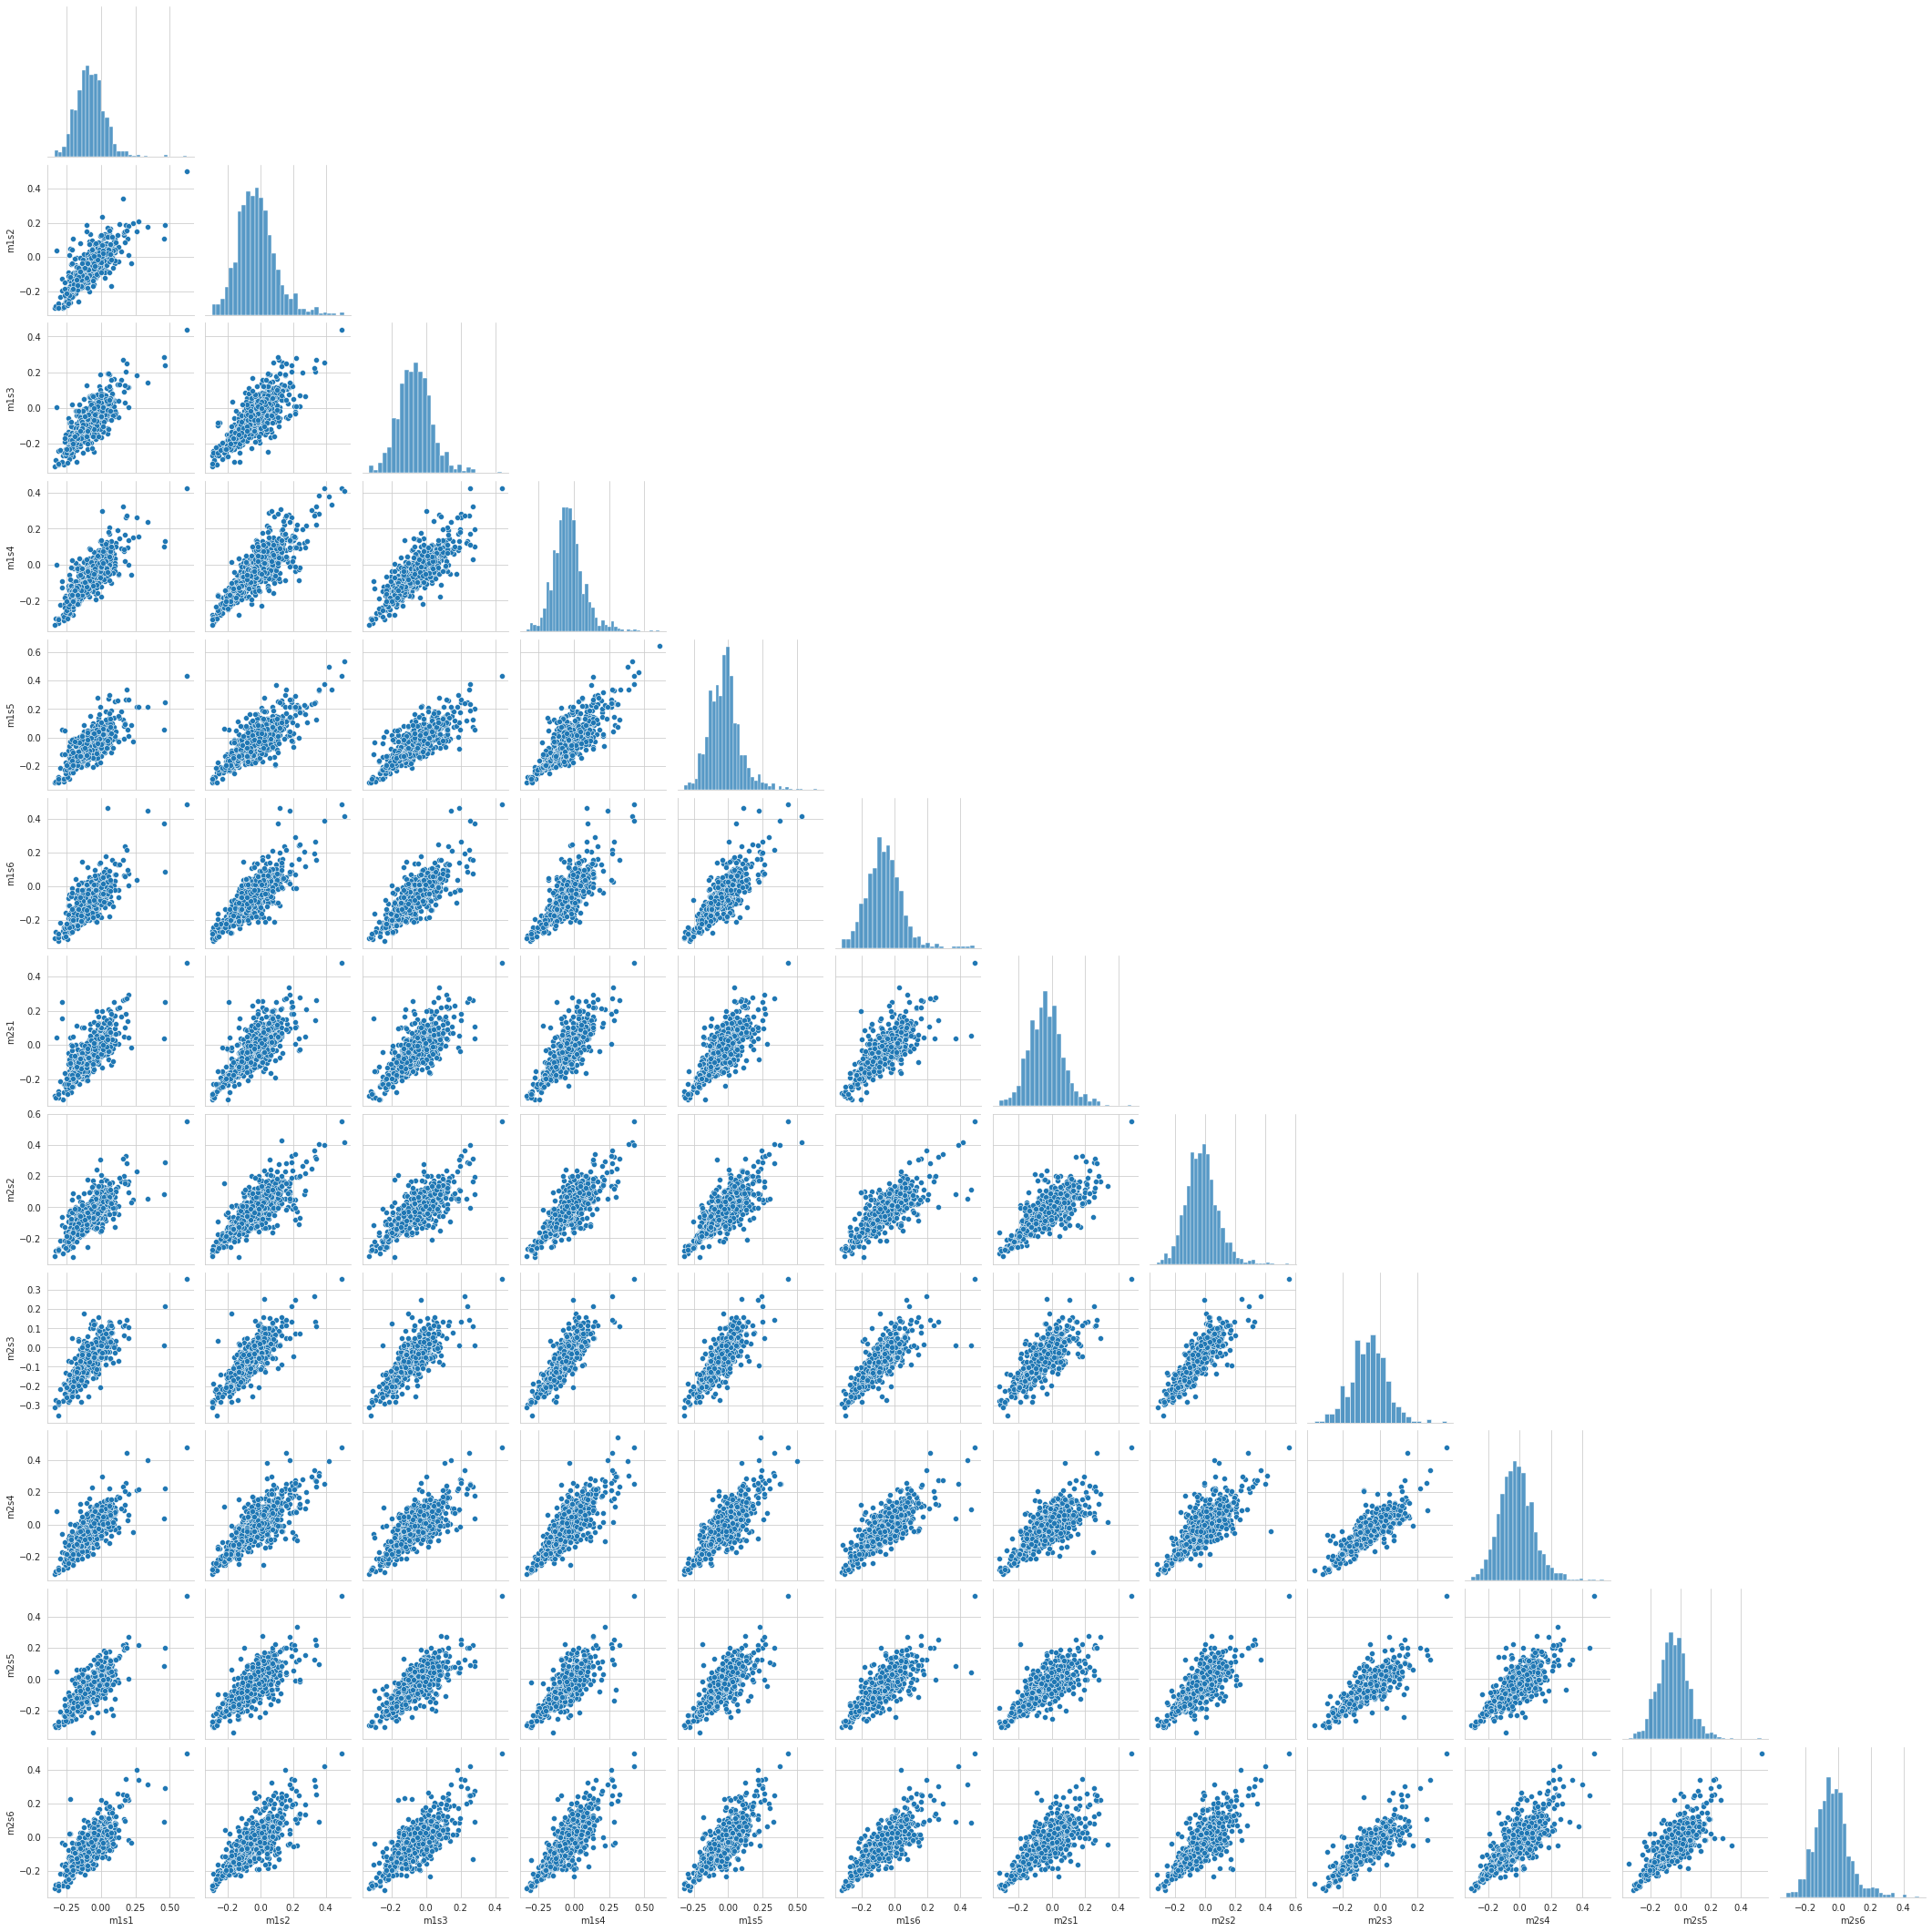

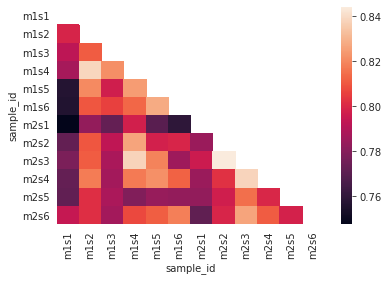

In [48]:
#Goal of these plots is to show that gene/ontology median score is well-correlated across biological replicates

#pairplot
sns.pairplot(
    sample_pair_df,
    corner=True,
)
plt.show()
plt.close()


#heatmap
hm_df = sample_pair_df.corr()
mask = np.zeros_like(hm_df)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    hm_df,
    mask=mask,
)
plt.show()
plt.close()

/home/users/rbierman/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


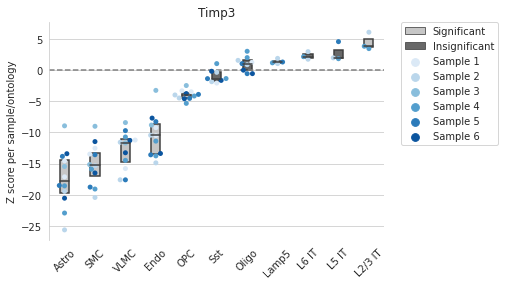

In [49]:
# simplified diagram for a single gene
gene = 'Timp3'

plot_df = mop_radial_df[mop_radial_df['gene'].eq(gene)].copy()
plot_df = plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
plot_df['mouse'] = 'Mouse '+plot_df['sample_id'].str[1]
plot_df['sample'] = 'Sample '+plot_df['sample_id'].str[3]
plot_df['mean_ont_z'] = plot_df.groupby('ontology')['z'].transform('mean')
sig = plot_df.groupby('ontology')['bh_p'].transform('mean').le(0.05)
plot_df['significant'] = np.where(sig,'Significant','Insignificant')
plot_df = plot_df.sort_values('mean_ont_z')

ax = sns.swarmplot(
    x = 'ontology',
    y = 'z',
    hue = 'sample',
    hue_order = sorted(plot_df['sample'].unique()),
    palette = 'Blues',
    data = plot_df,
)
sns.boxplot(
    x = 'ontology',
    y = 'z',
    hue = 'significant',
    dodge = False,
    width=0.3,
    #showbox=False,
    whiskerprops={'visible':False},
    showcaps=False,
    #capprops={'color':'white'},
    palette = 'Greys',
    fliersize = 0,
    data = plot_df,
    zorder = 10,
    ax = ax,
)
ax.tick_params(left=False, bottom=False)
sns.despine(bottom=True)
plt.axhline(0,linestyle='dashed',color='grey')
plt.title('{}'.format(gene))
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Z score per sample/ontology')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#plt.savefig('timp3_peripheral_ont_boxplot.svg')
plt.close()

In [53]:
mop_periph_df[mop_periph_df['gene'].eq('Timp3')]['ontology'].unique()

array(['Astro', 'Endo', 'OPC', 'SMC', 'Sst', 'VLMC', 'L2/3 IT', 'L5 IT',
       'L6 IT', 'L6 IT Car3', 'Lamp5', 'Oligo', 'Vip'], dtype=object)

In [54]:
mop_radial_df[mop_radial_df['gene'].eq('Timp3')]['ontology'].unique()

array(['Astro', 'Endo', 'OPC', 'SMC', 'Sst', 'VLMC', 'L2/3 IT', 'L5 IT',
       'L6 IT', 'L6 IT Car3', 'Lamp5', 'Oligo', 'Vip'], dtype=object)

## Combined Gene plots of radial and peripheral

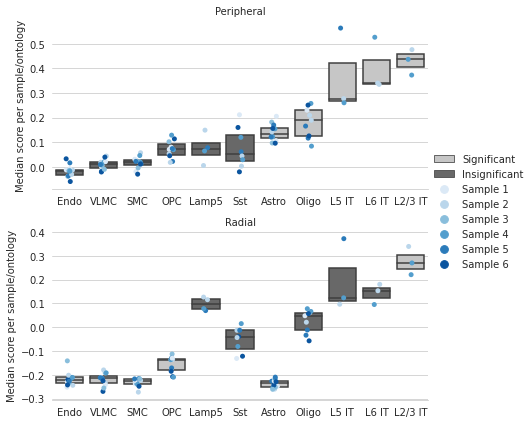

In [118]:
# simplified diagram for a single gene
gene = 'Timp3'

radial_plot_df = mop_radial_df[mop_radial_df['gene'].eq(gene)].copy()
radial_plot_df = radial_plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
radial_plot_df['mouse'] = 'Mouse '+radial_plot_df['sample_id'].str[1]
radial_plot_df['sample'] = 'Sample '+radial_plot_df['sample_id'].str[3]
radial_plot_df['mean_ont_z'] = radial_plot_df.groupby('ontology')['z'].transform('mean')
sig = radial_plot_df.groupby('ontology')['bh_p'].transform('mean').le(0.05)
radial_plot_df['significant'] = np.where(sig,'Significant','Insignificant')
radial_plot_df['metric'] = 'Radial'

periph_plot_df = mop_periph_df[mop_periph_df['gene'].eq(gene)].copy()
periph_plot_df = periph_plot_df.groupby('ontology').filter(lambda g: len(g) >= 3) #filtering out ontologies with too few samples
periph_plot_df['mouse'] = 'Mouse '+periph_plot_df['sample_id'].str[1]
periph_plot_df['sample'] = 'Sample '+periph_plot_df['sample_id'].str[3]
periph_plot_df['mean_ont_z'] = periph_plot_df.groupby('ontology')['z'].transform('mean')
periph_plot_df['mean_ont_score'] = periph_plot_df.groupby('ontology')['med_score'].transform('mean')
sig = periph_plot_df.groupby('ontology')['bh_p'].transform('mean').le(0.05)
periph_plot_df['significant'] = np.where(sig,'Significant','Insignificant')
periph_plot_df['metric'] = 'Peripheral'

#order ontologies by increasing peripheral z-score
ont_order = (
    periph_plot_df
        .set_index('ontology')['mean_ont_score']
        .sort_values()
        .drop_duplicates()
        .index
)

plot_df = pd.concat((periph_plot_df,radial_plot_df))

sns.set_style("whitegrid")

g = sns.catplot(
    x = 'ontology',
    y = 'med_score',
    row = 'metric',
    order = ont_order,
    kind = 'box',
    height = 3,
    aspect = 2,
    hue = 'significant',
    palette = 'Greys',
    legend = False,
    dodge = False,
    sharex = False,
    sharey = False,
    fliersize = 0,
    whiskerprops={'visible':False},
    showcaps=False,
    data = plot_df,
)

g.map_dataframe(
    sns.stripplot,
    order=ont_order,
    x='ontology',
    y='med_score',
    hue='sample',
    palette='Blues', 
    dodge=False,
)

g.add_legend()

(
    g.set_axis_labels('', 'Median score per sample/ontology')
        .set_titles('{row_name}')
        .despine(left=True)
)

plt.show(g)
g.savefig('timp3_combined_boxplot.svg')
plt.close()

# Vizgen peripheral

In [192]:
viz_periph_df = pd.read_csv('../outputs/gene_ontology/Vizgen_Brainmap_peripheral.csv')
viz_periph_df['Slice'] = 'Slice '+viz_periph_df['sample_id'].str[1]
viz_periph_df['Replicate'] = 'Replicate '+viz_periph_df['sample_id'].str[3]
viz_periph_df.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Slice,Replicate
0,s1r1,Abcc9,14,20,10.0,880.0,-0.056263,-0.984834,1.544349,-0.792483,0.428079,0.504933,Slice 1,Replicate 1
1,s1r1,Ackr1,0,430,10.5,993.5,0.009465,0.330981,33.477725,0.057204,0.954383,0.965548,Slice 1,Replicate 1
2,s1r1,Ackr1,1,443,13.0,948.0,-0.019802,-9.590985,30.814218,-1.727777,0.084028,0.122993,Slice 1,Replicate 1
3,s1r1,Ackr1,2,321,10.0,959.0,-0.034091,-8.687521,25.477803,-1.721135,0.085226,0.124497,Slice 1,Replicate 1
4,s1r1,Ackr1,3,273,8.0,1092.0,-0.023364,-5.742935,24.924740,-1.150320,0.250012,0.320098,Slice 1,Replicate 1


In [203]:
sample_pair_df

Replicate,gene,annotation,Slice,Replicate 1,Replicate 2,Replicate 3
0,Abcc9,8,Slice 3,NaN,NaN,-0.048385
1,Abcc9,14,Slice 1,-0.056263,-0.175052,0.089872
2,Ackr1,0,Slice 1,0.009465,-0.027523,-0.044813
3,Ackr1,0,Slice 2,-0.056000,-0.063899,-0.105082
4,Ackr1,0,Slice 3,-0.053719,-0.053224,-0.000328
...,...,...,...,...,...,...
10794,Vipr2,20,Slice 2,-0.211903,-0.247835,-0.192923
10795,Vipr2,28,Slice 2,-0.210000,-0.224215,-0.242747
10796,Vipr2,34,Slice 2,-0.224399,-0.119534,-0.122184
10797,Vipr2,35,Slice 2,NaN,-0.299975,-0.132673


In [221]:
sns.set_style("white")
sample_pair_df = viz_periph_df.pivot(
    index = ['gene','annotation','Slice'],
    columns = 'Replicate',
    values = 'med_score',
).reset_index(2).sort_values('Slice')

sample_pair_df

Replicate           Slice  Replicate 1  Replicate 2  Replicate 3
gene  annotation                                                
Man1a 0           Slice 1    -0.104371    -0.061130    -0.081471
Htr7  13          Slice 1     0.183693          NaN          NaN
Dgkk  7           Slice 1     0.162191    -0.053061     0.152778
      19          Slice 1     0.147789     0.091489     0.258164
Htr7  7           Slice 1     0.110577    -0.026627     0.058317
...                   ...          ...          ...          ...
Drd2  20          Slice 3     0.196697     0.143643     0.139701
Htr2c 7           Slice 3          NaN     0.014237     0.058215
Drd2  22          Slice 3     0.213642     0.121160     0.136289
      13          Slice 3     0.165006     0.138907     0.104830
Abcc9 8           Slice 3          NaN          NaN    -0.048385

[10799 rows x 4 columns]

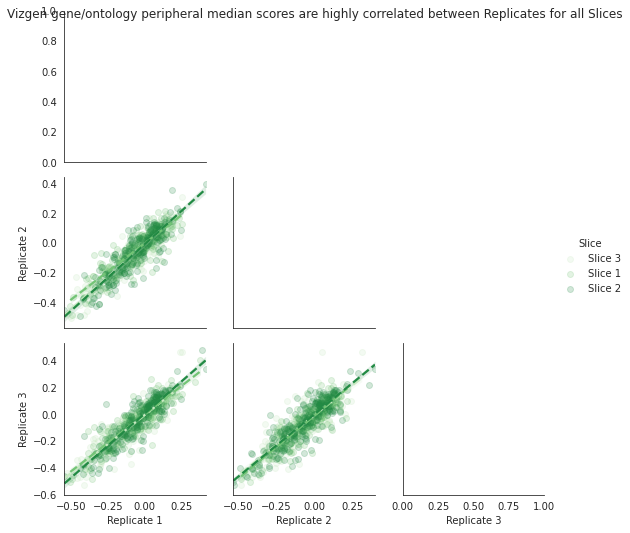

In [259]:
g = sns.PairGrid(
    sample_pair_df.sample(1000), #downsample to decrease plotting size
    corner = True,
    hue = 'Slice',
    palette = 'Greens',
)
g.map_offdiag(
    sns.regplot,
    scatter_kws = {'alpha':0.2},
    line_kws = {'linestyle':'dashed'},
)
g.add_legend()
plt.suptitle('Vizgen gene/ontology peripheral median scores are highly correlated between Replicates for all Slices')
g.savefig('viz_peripheral_gene_ont_corr_across_slices.svg')
plt.show()
plt.close()

# Vizgen radial

In [253]:
viz_radial_df = pd.read_csv('../outputs/gene_ontology/Vizgen_Brainmap_radial.csv')
viz_radial_df['Slice'] = 'Slice '+viz_radial_df['sample_id'].str[1]
viz_radial_df['Replicate'] = 'Replicate '+viz_radial_df['sample_id'].str[3]
viz_radial_df.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p,Slice,Replicate
0,s1r1,Abcc9,14,20,10.0,880.0,0.244697,3.335148,1.544349,2.683752,7.280105e-03,2.278986e-02,Slice 1,Replicate 1
1,s1r1,Ackr1,0,430,10.5,993.5,0.000952,0.410696,33.477725,0.070981,9.434128e-01,9.623304e-01,Slice 1,Replicate 1
2,s1r1,Ackr1,1,443,13.0,948.0,-0.101079,-30.136191,30.814218,-5.428912,5.669869e-08,4.640707e-07,Slice 1,Replicate 1
3,s1r1,Ackr1,2,321,10.0,959.0,-0.049596,-8.577276,25.477803,-1.699293,8.926391e-02,1.709836e-01,Slice 1,Replicate 1
4,s1r1,Ackr1,3,273,8.0,1092.0,-0.003559,7.953157,24.924740,1.593031,1.111532e-01,2.018097e-01,Slice 1,Replicate 1


In [260]:
sns.set_style("white")
sample_pair_df = viz_radial_df.pivot(
    index = ['gene','annotation','Slice'],
    columns = 'Replicate',
    values = 'med_score',
).reset_index(2).sort_values('Slice')

sample_pair_df

Replicate           Slice  Replicate 1  Replicate 2  Replicate 3
gene  annotation                                                
Man1a 0           Slice 1    -0.025303     0.039587     0.001105
Htr7  13          Slice 1     0.135494          NaN          NaN
Dgkk  7           Slice 1     0.004255     0.162743    -0.031179
      19          Slice 1     0.157700    -0.065338     0.039842
Htr7  7           Slice 1     0.057759    -0.176871     0.065712
...                   ...          ...          ...          ...
Drd2  20          Slice 3    -0.058421    -0.032842    -0.104641
Htr2c 7           Slice 3          NaN     0.074553     0.107913
Drd2  22          Slice 3     0.209983     0.056769    -0.043867
      13          Slice 3    -0.086316    -0.097990    -0.062863
Abcc9 8           Slice 3          NaN          NaN     0.168576

[10799 rows x 4 columns]

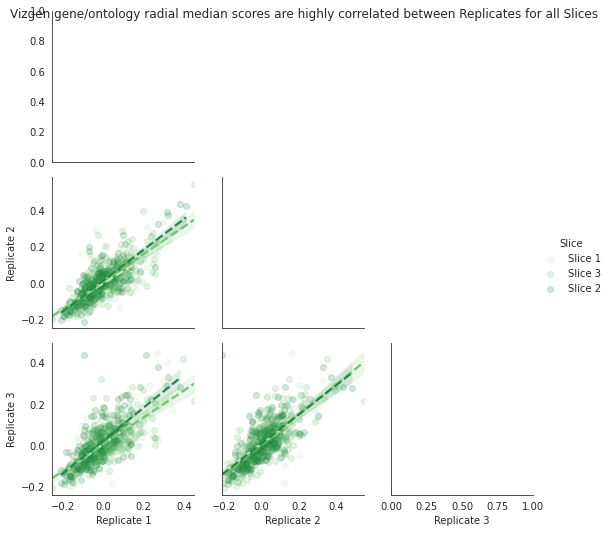

In [261]:
g = sns.PairGrid(
    sample_pair_df.sample(1000), #downsample to decrease plotting size
    corner = True,
    hue = 'Slice',
    palette = 'Greens',
)
g.map_offdiag(
    sns.regplot,
    scatter_kws = {'alpha':0.2},
    line_kws = {'linestyle':'dashed'},
)
g.add_legend()
plt.suptitle('Vizgen gene/ontology radial median scores are highly correlated between Replicates for all Slices')
g.savefig('viz_radial_gene_ont_corr_across_slices.svg')
plt.show()
plt.close()

# SeqFISH peripheral

Note that since SeqFISH does not have biological/technical replicates, I'll be plotting where each point on the scatterplot is an individual gene/cell I think

In [98]:
sfish_gc_periph = pd.read_csv('../outputs/gene_cell/SeqFish_peripheral.csv')
sfish_gc_periph.head()

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate
0,peripheral,cell_115,Endothelial,843,Aanat,1,821.0,-0.947743,0.334125,1,1,1
1,peripheral,cell_115,Endothelial,843,Aar2,1,369.0,0.125891,0.334125,1,1,1
2,peripheral,cell_115,Endothelial,843,Aars,1,470.0,-0.114014,0.334125,1,1,1
3,peripheral,cell_115,Endothelial,843,Aatf,1,487.0,-0.154394,0.334125,1,1,1
4,peripheral,cell_115,Endothelial,843,Ackr3,2,443.0,-0.049881,0.166864,1,1,1


In [111]:
pair_df = sfish_agg.pivot(
    index = 'gene',
    columns = 'annotation',
    values = 'med_score',
)
corr_df = pair_df.corr()
corr_df

annotation,Astrocytes deep,Astrocytes superficial,Endothelial,Ependymal,Excitatory 5/6,Excitatory layer 3,Excitatory layer 4,Excitatory layer 5/6,Excitatory layer II,Interneuron,Interneurons deep,Microglia,NSC,Neural progenitors,Neuroblasts,OPC,Oligodendrocytes,choroid plexus
annotation,,,,,,,,,,,,,,,,,,
Astrocytes deep,1.000000,0.004145,0.029276,-0.431954,0.017458,0.071000,0.047651,0.093981,0.050146,0.014540,0.029948,0.039193,0.048329,-0.004694,0.033306,0.007669,0.012791,0.012491
Astrocytes superficial,0.004145,1.000000,0.052177,-0.002274,0.061106,0.034500,0.026778,0.065723,0.013884,0.025967,0.013918,0.024695,0.003311,0.085543,-0.098858,0.041107,0.039417,0.049035
Endothelial,0.029276,0.052177,1.000000,0.319160,0.032928,0.025580,0.026867,0.058065,0.002463,0.026440,0.035752,0.132241,0.018608,0.066721,0.033290,0.098347,0.069001,0.028283
Ependymal,-0.431954,-0.002274,0.319160,1.000000,-0.200935,0.157722,-0.636301,-0.260309,0.538195,0.420628,-0.226724,-0.239412,-0.086652,0.275783,-0.302100,0.698414,-0.205284,0.123962
Excitatory 5/6,0.017458,0.061106,0.032928,-0.200935,1.000000,0.045535,0.018656,0.076719,0.047234,0.030175,0.041091,0.106687,0.091742,0.058710,0.141481,0.049357,0.019471,0.024489
Excitatory layer 3,0.071000,0.034500,0.025580,0.157722,0.045535,1.000000,0.059639,0.117042,0.084124,0.049993,0.043390,0.083773,0.069361,0.053343,0.140424,-0.024450,-0.017535,0.021059
Excitatory layer 4,0.047651,0.026778,0.026867,-0.636301,0.018656,0.059639,1.000000,0.080375,0.049610,0.021794,0.033555,0.031773,0.038379,0.066574,-0.049035,0.012380,-0.002847,0.030111
Excitatory layer 5/6,0.093981,0.065723,0.058065,-0.260309,0.076719,0.117042,0.080375,1.000000,0.067911,0.051056,0.066142,0.180000,0.133176,0.066177,0.113058,0.056590,0.056159,0.027153
Excitatory layer II,0.050146,0.013884,0.002463,0.538195,0.047234,0.084124,0.049610,0.067911,1.000000,0.028541,0.027996,0.111954,0.052154,0.020989,0.037912,0.030677,0.002265,0.011049


In [134]:
long_corr_df = corr_df.reset_index().melt(id_vars='annotation',var_name='ont',value_name='corr')
long_corr_df[long_corr_df['corr'].abs().between(0.6,0.99)]

,annotation,ont,corr
60,Excitatory layer 4,Ependymal,-0.636301
69,OPC,Ependymal,0.698414
111,Ependymal,Excitatory layer 4,-0.636301
273,Ependymal,OPC,0.698414


annotation_group      Excitatory layer 3  Excitatory layer 5/6
annotation_group                                              
Excitatory layer 3              1.000000              0.117042
Excitatory layer 5/6            0.117042              1.000000


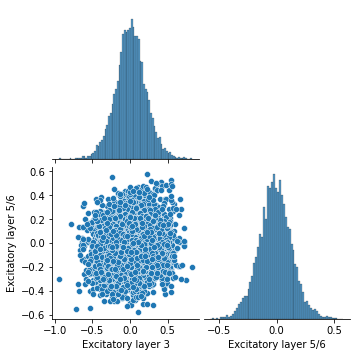

In [101]:
sfish_agg = sfish_gc_periph.groupby(['gene','annotation']).agg(
    med_score = ('score','median'),
    num_cells = ('cell_id','nunique'),
).reset_index()

sfish_agg = sfish_agg[sfish_agg['num_cells'].ge(5)]

sfish_agg.loc[sfish_agg['annotation'].eq('Excitatory layer 5/6'), 'annotation_group'] = 'Excitatory layer 5/6'
sfish_agg.loc[sfish_agg['annotation'].eq('Excitatory layer 3'), 'annotation_group'] = 'Excitatory layer 3'
pair_df = sfish_agg.pivot_table(
    index='gene',
    columns='annotation_group',
    values='med_score',
)
print(pair_df.corr())
sns.pairplot(pair_df,corner=True)
plt.show()
plt.close()

In [78]:
sfish_periph = pd.read_csv('../outputs/gene_ontology/SeqFish_peripheral.csv')
#sfish_periph = sfish_periph.groupby('gene').filter(lambda g: g['annotation'].nunique() > 5)
sfish_periph.head()

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,m1s1,Aamp,Excitatory layer 5/6,20,5.5,12498.0,0.094839,2.226461,2.419260,1.431442,0.152304,0.358706
1,m1s1,Abhd12,Excitatory layer 3,27,7.0,6857.0,0.077749,2.312100,3.110525,1.310961,0.189871,0.400258
2,m1s1,Abhd12,Excitatory layer 5/6,37,9.0,9883.0,0.078507,2.429686,3.503960,1.297988,0.194292,0.402065
3,m1s1,Abhd2,choroid plexus,65,8.0,2346.0,-0.047155,-3.246480,6.201979,-1.303610,0.192367,0.401358
4,m1s1,Abhd8,Excitatory layer 3,50,8.0,6110.5,0.003112,2.237509,4.840814,1.016964,0.309171,0.536310


In [79]:
sfish_periph['gene'].nunique()

284

In [80]:
sfish_periph['annotation'].nunique()

11

In [81]:
sfish_periph.groupby(['annotation'])['gene'].nunique()

annotation
Astrocytes deep             2
Astrocytes superficial      6
Endothelial                 8
Excitatory 5/6             60
Excitatory layer 3        110
Excitatory layer 4         15
Excitatory layer 5/6      236
Excitatory layer II        26
Interneuron                 7
Oligodendrocytes            6
choroid plexus             31
Name: gene, dtype: int64

In [84]:
sfish_periph.loc[sfish_periph['annotation'].str.contains('Excitatory'), 'annotation_group'] = 'Excitatory'
sfish_periph.loc[sfish_periph['annotation'].str.contains('Interneuron'), 'annotation_group'] = 'Interneuron'
sfish_periph.pivot_table(
    index='gene',
    columns='annotation_group',
    values='med_score',
)

annotation_group,Excitatory,Interneuron
gene,,
Aamp,0.094839,NaN
Abhd12,0.078128,NaN
Abhd8,0.089012,NaN
Actr1a,0.060528,NaN
Actr1b,0.032112,NaN
...,...,...
Uqcrc1,0.045570,NaN
Vgf,-0.109173,NaN
Wbp2,0.018818,NaN


In [68]:
for gene,g in sfish_periph.groupby('gene'):
    break

In [69]:
g

,sample_id,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
20,m1s1,Agap2,Excitatory 5/6,27,13.0,8076.0,0.270867,6.195320,1.811778,4.602684,4.170802e-06,1.057298e-04
21,m1s1,Agap2,Excitatory layer 3,53,9.0,6079.0,0.174550,5.297682,4.780462,2.422986,1.539352e-02,6.659578e-02
22,m1s1,Agap2,Excitatory layer 4,22,6.0,4117.0,0.295816,6.816844,2.449672,4.355414,1.328159e-05,2.589910e-04
23,m1s1,Agap2,Excitatory layer 5/6,83,10.0,6358.0,0.262701,21.653790,7.030962,8.166323,2.220446e-16,1.876277e-14
24,m1s1,Agap2,Excitatory layer II,44,8.0,4430.0,0.071017,2.659240,4.136622,1.307478,1.910503e-01,4.002582e-01
25,m1s1,Agap2,Interneuron,20,7.0,3820.0,0.144387,3.580026,2.144709,2.444567,1.450261e-02,6.565020e-02
